<a href="https://colab.research.google.com/github/hernandemonteiro/host_national_search_2015/blob/main/host_national_search_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [2]:
# add packages
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("dados.csv")

# Frequency Distributions qualitative variables



In [5]:
data.Sexo.value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

In [6]:
data.Sexo.value_counts(normalize=True)

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [7]:
frequency = data.Sexo.value_counts()

In [8]:
percent = data.Sexo.value_counts(normalize=True) * 100

In [9]:
dist_freq_qual = pd.DataFrame({
    "frequency": frequency,
    "Percent %": percent
})


dist_freq_qual.rename(index={
    0: "Man",
    1: "Woman"
}, inplace=True)


dist_freq_qual.rename_axis("Gender", axis="columns", inplace=True)

dist_freq_qual

Gender,frequency,Percent %
Man,53250,69.299844
Woman,23590,30.700156


Or use this second way:

In [10]:
gender = {
    0: "Man",
    1: "Woman"
}


color = {
    0: "Native",
    2: "White",
    4: "Black",
    6: "Yellow",
    8: "Parda*",
    9: "No declareted"
}

In [11]:
frequency = pd.crosstab(data.Sexo, data.Cor)


frequency.rename(index=gender, inplace=True)


frequency.rename(columns=color, inplace=True)


frequency

Cor,Native,White,Black,Yellow,Parda*
Sexo,,,,,
Man,256,22194,5502,235,25063
Woman,101,9621,2889,117,10862


# Frequency distributions - quantitative variables

In [12]:
data.Renda.min()

0

In [13]:
data.Renda.max()

200000

In [14]:
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [15]:
labels = ['E', 'D', 'C', 'B', 'A']

In [16]:
pd.cut(x=data.Renda, bins=classes, labels=labels, include_lowest=True)

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [17]:
renda_per_pop = pd.value_counts(pd.cut(x=data.Renda, bins=classes, labels=labels, include_lowest=True))


renda_per_pop


E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

<Axes: title={'center': 'Salários da população em 2015'}, xlabel='Quantidade de SMs', ylabel='Quantidade de pessoas'>

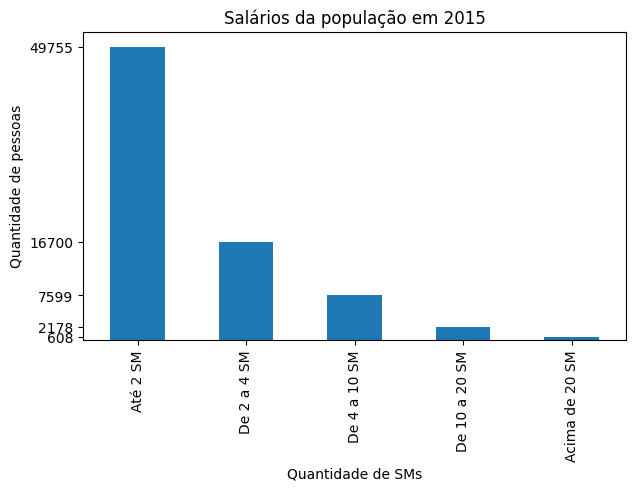

In [18]:

labels_dict = {
    'E': "Até 2 SM",
    'D': "De 2 a 4 SM",
    'C': "De 4 a 10 SM",
    'B': "De 10 a 20 SM",
    'A': "Acima de 20 SM"
}

renda_per_pop.rename(index=labels_dict, inplace=True)


plot_pop_sm = renda_per_pop.plot(kind="bar", title="Salários da população em 2015",
                                      xlabel="Quantidade de SMs", ylabel="Quantidade de pessoas",
                                      figsize=(7, 4), yticks=renda_per_pop)


plot_pop_sm

In [19]:
# Other methods
import numpy as np


n = data.shape[0]
n

76840

In [20]:
k = 1 + (10 / 3) * np.log10(n)
k

17.285291187298853

In [21]:
k = int(k.round(0))
k

17

In [22]:
labels = {
    "(-200.001, 11764.706]": "Q",
    "(11764.706, 23529.412]": "P",
    "(23529.412, 35294.118]": "O",
    "(35294.118, 47058.824]": "N",
    "(47058.824, 58823.529]": "M",
    "(58823.529, 70588.235]": "L",
    "(70588.235, 82352.941]": "K",
    "(82352.941, 94117.647]": "J",
    "(94117.647, 105882.353]": "I",
    "(105882.353, 117647.059]	": "H",
    "(117647.059, 129411.765]": "G",
    "(129411.765, 141176.471]": "F",
    "(141176.471, 152941.176]	": "E",
    "(152941.176, 164705.882]": "D",
    "(164705.882, 176470.588]	": "C",
    "(176470.588, 188235.294]": "B",
    "(188235.294, 200000.0]": "A"
}
frequency = pd.value_counts(
    pd.cut(
        x=data.Renda,
        bins=k,
        include_lowest=True,
        labels=labels
    ),
    sort=False
)

print("frequency of renda:\n\n", frequency)

frequency of renda:

 (-200.001, 11764.706]         75594
(11764.706, 23529.412]         1022
(23529.412, 35294.118]          169
(35294.118, 47058.824]           19
(47058.824, 58823.529]           16
(58823.529, 70588.235]            5
(70588.235, 82352.941]            4
(82352.941, 94117.647]            1
(94117.647, 105882.353]           6
(105882.353, 117647.059]\t        0
(117647.059, 129411.765]          1
(129411.765, 141176.471]          0
(141176.471, 152941.176]\t        0
(152941.176, 164705.882]          0
(164705.882, 176470.588]\t        0
(176470.588, 188235.294]          0
(188235.294, 200000.0]            3
Name: Renda, dtype: int64


In [23]:

percent = pd.value_counts(
    pd.cut(
        x=data.Renda,
        bins=17,
        include_lowest=True,
        labels=labels
    ),
    sort=False,
    normalize=True,
) * 100
print("Percentual de renda: \n\n", percent)


Percentual de renda: 

 (-200.001, 11764.706]         98.378449
(11764.706, 23529.412]         1.330036
(23529.412, 35294.118]         0.219938
(35294.118, 47058.824]         0.024727
(47058.824, 58823.529]         0.020822
(58823.529, 70588.235]         0.006507
(70588.235, 82352.941]         0.005206
(82352.941, 94117.647]         0.001301
(94117.647, 105882.353]        0.007808
(105882.353, 117647.059]\t     0.000000
(117647.059, 129411.765]       0.001301
(129411.765, 141176.471]       0.000000
(141176.471, 152941.176]\t     0.000000
(152941.176, 164705.882]       0.000000
(164705.882, 176470.588]\t     0.000000
(176470.588, 188235.294]       0.000000
(188235.294, 200000.0]         0.003904
Name: Renda, dtype: float64


In [24]:


dist_freq_quant_fix_ampl = pd.DataFrame(
    {
        "Frequency": frequency,
        "Percent (%)": percent
     }

)
dist_freq_quant_fix_ampl.rename(index=labels, inplace=True)
dist_freq_quant_fix_ampl.rename_axis("Classes", axis="columns", inplace=True)
dist_freq_quant_fix_ampl

Classes,Frequency,Percent (%)
Q,75594,98.378449
P,1022,1.330036
O,169,0.219938
N,19,0.024727
M,16,0.020822
L,5,0.006507
K,4,0.005206
J,1,0.001301
I,6,0.007808
H,0,0.000000


# Using Seaborn to Plot

In [25]:
import seaborn as sns

# Height Frequencys without kde - histogram

<Axes: title={'center': 'Frequency Distributions - Height'}, xlabel='Height in metters', ylabel='Quantity of persons'>

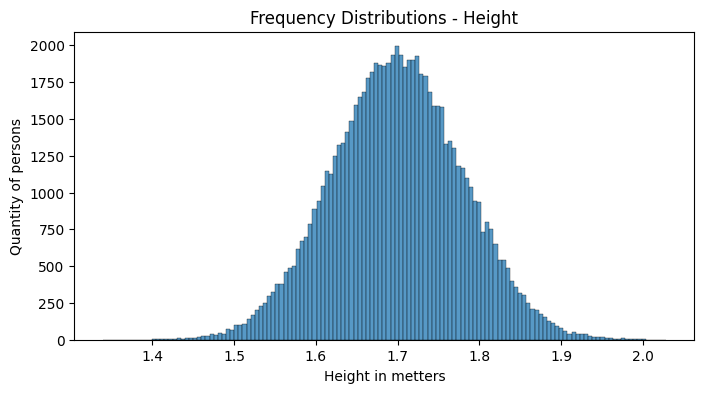

In [31]:
ax = sns.histplot(data.Altura, kde=False)

ax.figure.set_size_inches(8, 4)
ax.set_title("Frequency Distributions - Height", fontsize=12)
ax.set_xlabel("Height in metters", fontsize=10)
ax.set_ylabel("Quantity of persons", fontsize=10)
ax

# Height Frequencys with kde - histogram

<Axes: title={'center': 'Frequency Distributions - Height'}, xlabel='Height in metters', ylabel='Quantity of persons'>

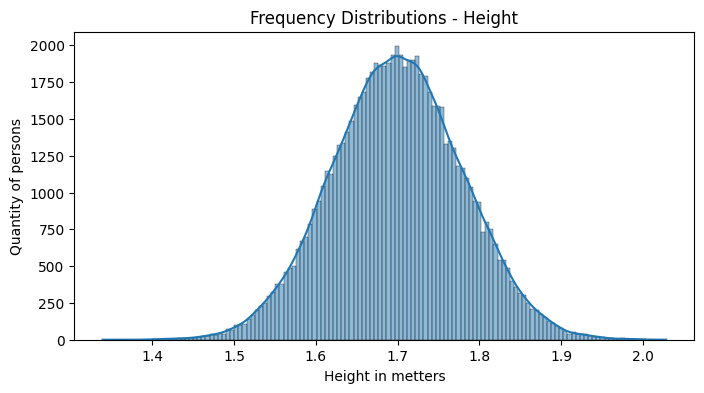

In [30]:
ax = sns.histplot(data.Altura, kde=True)

ax.figure.set_size_inches(8, 4)
ax.set_title("Frequency Distributions - Height", fontsize=12)
ax.set_xlabel("Height in metters", fontsize=10)
ax.set_ylabel("Quantity of persons", fontsize=10)
ax